# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

# Combine the data into a single DataFrame

mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")



# Display the data table for preview

mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [76]:
# Checking the number of mice.

mice_count = len(mouse_study["Mouse ID"].unique())

mice_count

249

In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_study[mouse_study.duplicated(subset=(["Mouse ID", "Timepoint"]))] # https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/#, referenced for how to find duplicate rows

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_cleaned = mouse_study.copy()
mouse_study_cleaned = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"] != "g989"]
mouse_study_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [80]:
# Checking the number of mice in the clean DataFrame.

mice_count_cleaned = len(mouse_study_cleaned["Mouse ID"].unique())
mice_count_cleaned

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimens_grouped = mouse_study_cleaned.groupby(["Drug Regimen"])

summary_mean = regimens_grouped["Tumor Volume (mm3)"].mean()
summary_median = regimens_grouped["Tumor Volume (mm3)"].median()
summary_variance = regimens_grouped["Tumor Volume (mm3)"].var()
summary_stdev = regimens_grouped["Tumor Volume (mm3)"].std()
summary_sem = regimens_grouped["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": summary_mean,
                              "Median Tumor Volume": summary_median,
                              "Tumor Volume Variance": summary_variance,
                              "Tumor Volume Std. Dev.": summary_stdev,
                              "Tumor Volume Std. Err.": summary_sem})

summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_2 =regimens_grouped.aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html, referenced for how to use aggregation

summary_stats_2


Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

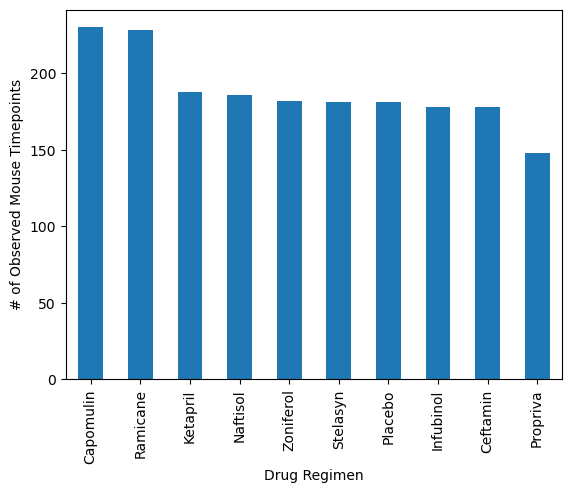

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

row_counts = mouse_study_cleaned["Drug Regimen"].value_counts()
x_label_bar = "Drug Regimen"
y_label_bar = "# of Observed Mouse Timepoints"
bar_chart = row_counts.plot(kind="bar", xlabel=x_label_bar, ylabel=y_label_bar)
plt.show()



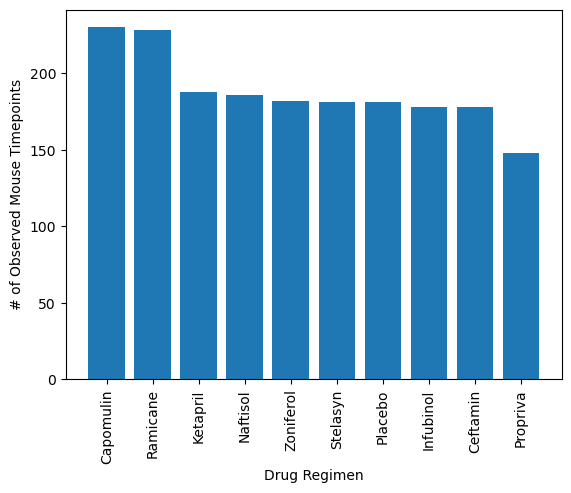

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_names = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

plt.bar(drug_names, row_counts)
plt.xlabel(x_label_bar)
plt.ylabel(y_label_bar)
plt.xticks(row_counts.index.name, rotation="vertical")
plt.show()


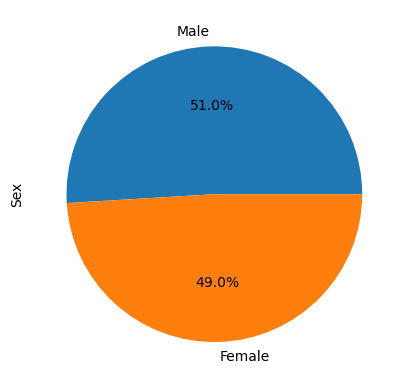

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = mouse_study_cleaned["Sex"].value_counts()
pie_chart = mouse_sex.plot(kind="pie", autopct="%1.1f%%")
plt.show()

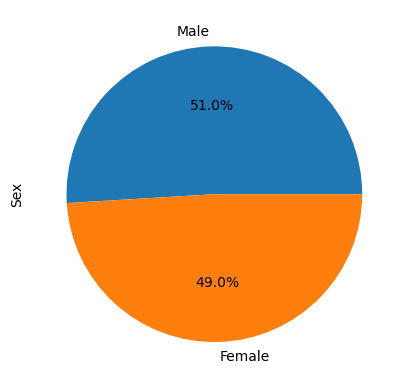

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Male", "Female"]

plt.pie(mouse_sex, labels=sexes, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#final_tumor_volume = []
#max_timepoint

#for mouse in mouse_study_cleaned["Mouse ID"].unique():
    
    #max_timepoint = mouse_study_cleaned["Timepoint"].max()

    #if max_timepoint == mouse_study_cleaned["Timepoint"].max():
        #inal_volume = mouse_study_cleaned["Tumor Volume (mm3)"]
        #final_tumor_volume.append({"Mouse": mouse, "Timepoint": #max_timepoint, "Tumor Volume": #final_volume})
    #print(mouse)
    #print(mouse_study_cleaned["Timepoint"].max())

    #if mouse_study_cleaned["Timepoint"] > max_timepoint:

unique_mice = mouse_study_cleaned.groupby(["Mouse ID"])

last_timepoint = pd.DataFrame(unique_mice["Timepoint"].last())
last_timepoint = last_timepoint.reset_index() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html, referenced for how to reset index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(mouse_study_cleaned, last_timepoint, how="inner")
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [88]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatments

# Create empty list to fill with tumor vol data (for plotting)

capomulin_vol_data = []
ramicane_vol_data = []
infubinol_vol_data = []
ceftamin_vol_data = []

for result in final_tumor_volume.index:
    
    tumor_volume = final_tumor_volume["Tumor Volume (mm3)"][result] # https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/, referenced for iterating over rows in DataFrame and accessing particular values in that row
    
    if final_tumor_volume["Drug Regimen"][result] == "Capomulin":
        capomulin_vol_data.append(tumor_volume)
    elif final_tumor_volume["Drug Regimen"][result] == "Ramicane":
        ramicane_vol_data.append(tumor_volume)
    elif final_tumor_volume["Drug Regimen"][result] == "Infubinol":
        infubinol_vol_data.append(tumor_volume)
    elif final_tumor_volume["Drug Regimen"][result] == "Ceftamin":
        ceftamin_vol_data.append(tumor_volume)

#capomulin_vol_data
#ramicane_vol_data
#infubinol_vol_data
#ceftamin_vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#this probably makes sense to set up as a function but I'll get it to work first and then edit if I have time
capomulin_lower_q = np.quantile(capomulin_vol_data, 0.25) # https://www.geeksforgeeks.org/numpy-quantile-in-python/#, referenced for how to determine quartiles from a list
capomulin_upper_q = np.quantile(capomulin_vol_data, 0.75)
capomulin_median = np.quantile(capomulin_vol_data, 0.5)
capomulin_iqr = capomulin_upper_q - capomulin_lower_q
capomulin_lower_bound = capomulin_lower_q - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upper_q + (1.5 * capomulin_iqr)

capomulin_outliers = []

for cap_value in capomulin_vol_data:
    if (cap_value < capomulin_lower_bound) or (cap_value > capomulin_upper_bound):
        capomulin_outliers.append(cap_value)

ramicane_lower_q = np.quantile(ramicane_vol_data, 0.25)
ramicane_upper_q = np.quantile(ramicane_vol_data, 0.75)
ramicane_median = np.quantile(ramicane_vol_data, 0.5)
ramicane_iqr = ramicane_upper_q - ramicane_lower_q
ramicane_lower_bound = ramicane_lower_q - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upper_q + (1.5 * ramicane_iqr)

ramicane_outliers = []

for ram_value in ramicane_vol_data:
    if (ram_value < ramicane_lower_bound) or (ram_value > ramicane_upper_bound):
        ramicane_outliers.append(ram_value)

infubinol_lower_q = np.quantile(infubinol_vol_data, 0.25)
infubinol_upper_q = np.quantile(infubinol_vol_data, 0.75)
infubinol_median = np.quantile(infubinol_vol_data, 0.5)
infubinol_iqr = infubinol_upper_q - infubinol_lower_q
infubinol_lower_bound = infubinol_lower_q - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upper_q + (1.5 * infubinol_iqr)

infubinol_outliers = []

for inf_value in infubinol_vol_data:
    if (inf_value < infubinol_lower_bound) or (inf_value > infubinol_upper_bound):
        infubinol_outliers.append(inf_value)

ceftamin_lower_q = np.quantile(ceftamin_vol_data, 0.25)
ceftamin_upper_q = np.quantile(ceftamin_vol_data, 0.75)
ceftamin_median = np.quantile(ceftamin_vol_data, 0.5)
ceftamin_iqr = ceftamin_upper_q - ceftamin_lower_q
ceftamin_lower_bound = ceftamin_lower_q - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_q + (1.5 * ceftamin_iqr)

ceftamin_outliers = []

for cef_value in ceftamin_vol_data:
    if (cef_value < ceftamin_lower_bound) or (cef_value > ceftamin_upper_bound):
        ceftamin_outliers.append(cef_value)













#print(f" Capomulin data {capomulin_vol_data}")
#print(f" Capomulin lower bound {capomulin_lower_bound}")
#print(f" Capomulin upperr bound {capomulin_upper_bound}")
#print(f" Capomulin outliers {capomulin_outliers}")
print(f"Capomulin's potential outliers: {capomulin_outliers}")

#print(f" Ramicane data {ramicane_vol_data}")
#print(f" Ramicane lower bound {ramicane_lower_bound}")
#print(f" Ramicane upper bound {ramicane_upper_bound}")
#print(f" Ramicane outliers {ramicane_outliers}")
print(f"Ramicane's potential outliers: {ramicane_outliers}")

#print(f" infubinol data {infubinol_vol_data}")
#print(f" infubinol lower bound {infubinol_lower_bound}")
#print(f" infubinol upper bound {infubinol_upper_bound}")
#print(f" infubinol outliers {infubinol_outliers}")
print(f"Infubinol's potential outliers: {infubinol_outliers}")

#print(f" ceftamin data {ceftamin_vol_data}")
#print(f" ceftamin lower bound {ceftamin_lower_bound}")
#print(f" ceftamin upper bound {ceftamin_upper_bound}")
#print(f" ceftamin outliers {ceftamin_outliers}")
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


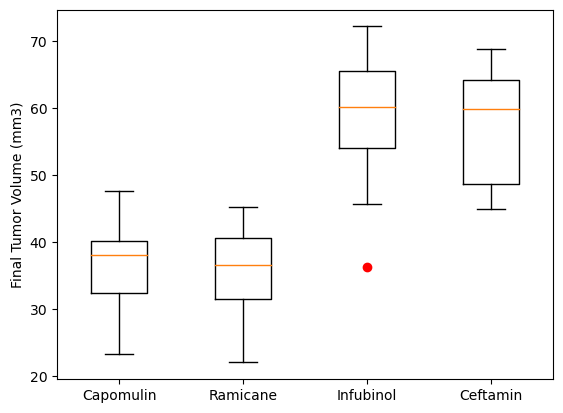

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

all_data = [capomulin_vol_data, ramicane_vol_data, infubinol_vol_data, ceftamin_vol_data]

plt.boxplot(all_data, sym="red", labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

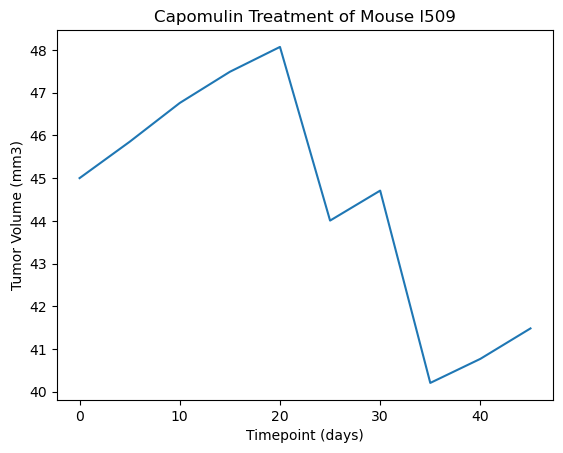

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_l509 = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"] == "l509"]
mouse_l509_timepoints = mouse_l509["Timepoint"]
mouse_l509_tumor = mouse_l509["Tumor Volume (mm3)"]
plt.plot(mouse_l509_timepoints, mouse_l509_tumor)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\dmrop\AppData\Local\Temp\ipykernel_6200\1447069196.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mice = capomulin_data.groupby(["Mouse ID"]).mean()


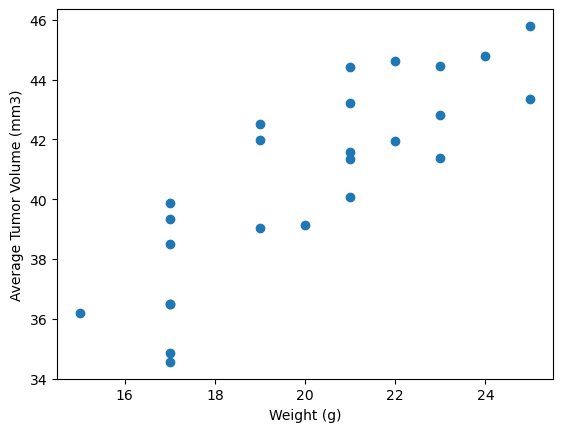

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_data.groupby(["Mouse ID"]).mean()

cap_weight = capomulin_mice["Weight (g)"]
cap_volume = capomulin_mice["Tumor Volume (mm3)"]

plt.scatter(cap_weight, cap_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


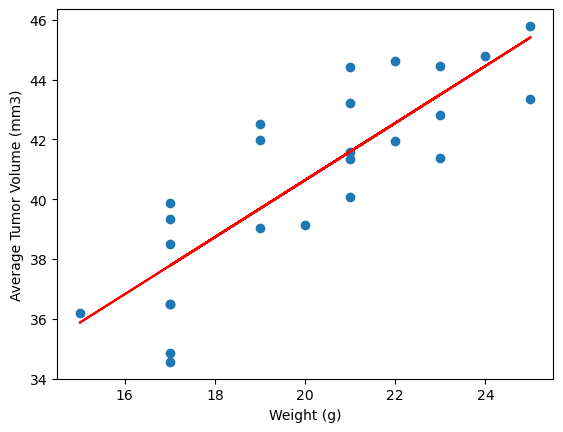

In [92]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coe = round(st.pearsonr(cap_weight, cap_volume)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coe}")

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(cap_weight, cap_volume)
corr_fit = cap_weight * corr_slope + corr_int

plt.scatter(cap_weight, cap_volume)
plt.plot(cap_weight, corr_fit, color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()